In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dexplot as dxp


red = ff0000
grey = cccccc
black = 333333

In [3]:
#read in the list of videos contained in the csv
df = pd.read_pickle('prepared.pkl')

## Combining the countries top 25 lists and control for duplicates. 
* This way we can classify what videos have been a top 25 video 


In [4]:
df.drop(columns='description').to_csv('combined_csv.csv')

In [5]:
df[df.duplicated(['video_id']) ==True]

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,comment_count,...,cleaned_tags,cleaned_desc,title_in_description,title_in_tags,pct_tags_in_description,title_lengths,desc_lengths,tags_length,content_rate,views_per_sub


## Engagement

In [6]:
df = df.sort_values(by='rank').drop_duplicates(['video_id']).reset_index(drop=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 2019 non-null   object             
 1   title                    2019 non-null   object             
 2   publishedAt              2019 non-null   datetime64[ns, UTC]
 3   channelTitle             2019 non-null   object             
 4   categoryId               2019 non-null   object             
 5   trending_date            2019 non-null   datetime64[ns, UTC]
 6   tags                     2019 non-null   object             
 7   view_count               2019 non-null   int64              
 8   likes                    2019 non-null   int64              
 9   comment_count            2019 non-null   int64              
 10  thumbnail_link           2019 non-null   object             
 11  comments_disabled        2019 

In [8]:
dxp.bar(x='region', y='engagement',split='top_25', data=df, aggfunc='median',\
     title='JP and KR with lowest overall engagement. India with largest jump')



/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


<Figure size 739.584x316.8 with 1 Axes>

In [9]:
dxp.bar(x='region', y='engagement',split='top_25', data=df, aggfunc='median',\
        row='categoryId', sharey=False,
        title='')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


<Figure size 739.584x2592 with 15 Axes>

In [10]:
dxp.bar(x='engagement', y='categoryId',split='top_25', data=df, aggfunc='median', orientation='h',\
     title='')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


<Figure size 388.8x691.2 with 1 Axes>

## Sponsored?


<AxesSubplot:ylabel='Frequency'>

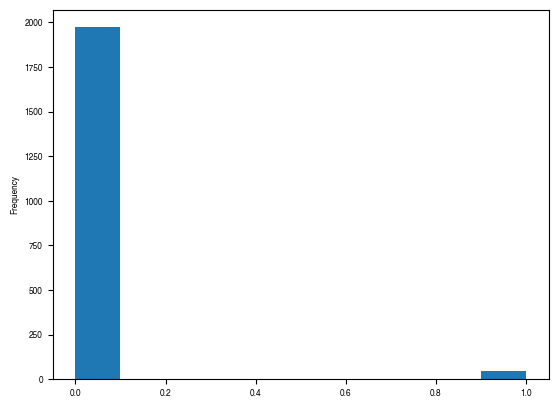

In [11]:
df.sponsored.plot.hist()

<AxesSubplot:>

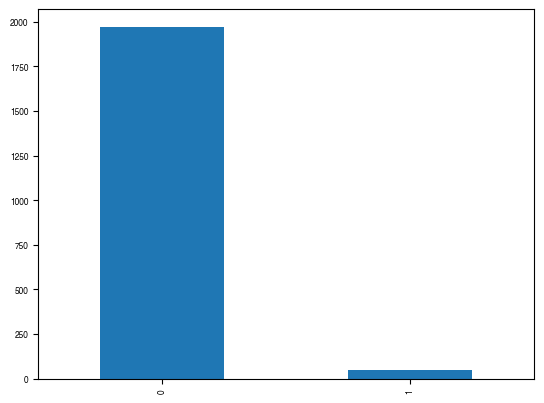

In [12]:
df.sponsored.value_counts().plot.bar()

## Video Region

Takeaways 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


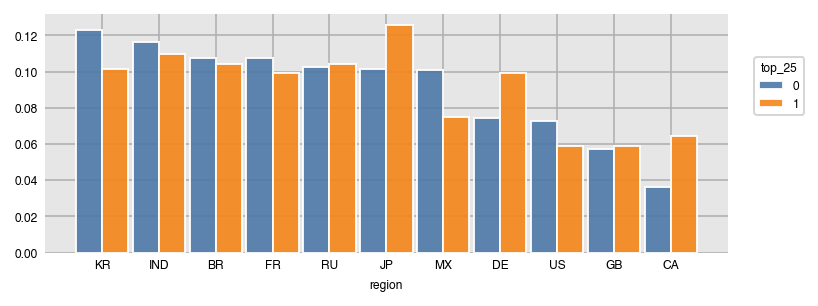

In [13]:
dxp.count('region', data=df, split='top_25', normalize='top_25')

In [14]:
df.categoryId.unique()

array(['Entertainment', 'Science_Technology', 'Gaming', 'News_Politics',
       'Film_Animation', 'Sports', 'People_Blogs', 'Comedy', 'Music',
       'Education', 'Autos_Vehicles', 'Howto_Style', 'Travel_Events',
       'Pets_Animals', 'Nonprofits_Activism'], dtype=object)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


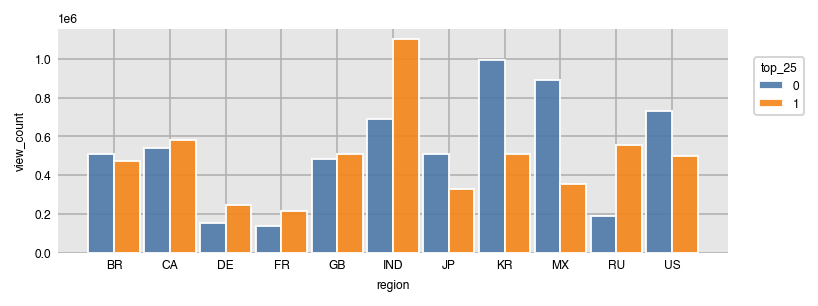

In [15]:
dxp.bar(x='region', y='view_count',split='top_25', data=df, aggfunc='median',\
     title='')

/opt/homebrew/anaconda3/lib/python3.9/site-packages/dexplot/_common_plot.py:156: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  self.data[name].cat.remove_unused_categories(inplace=True)


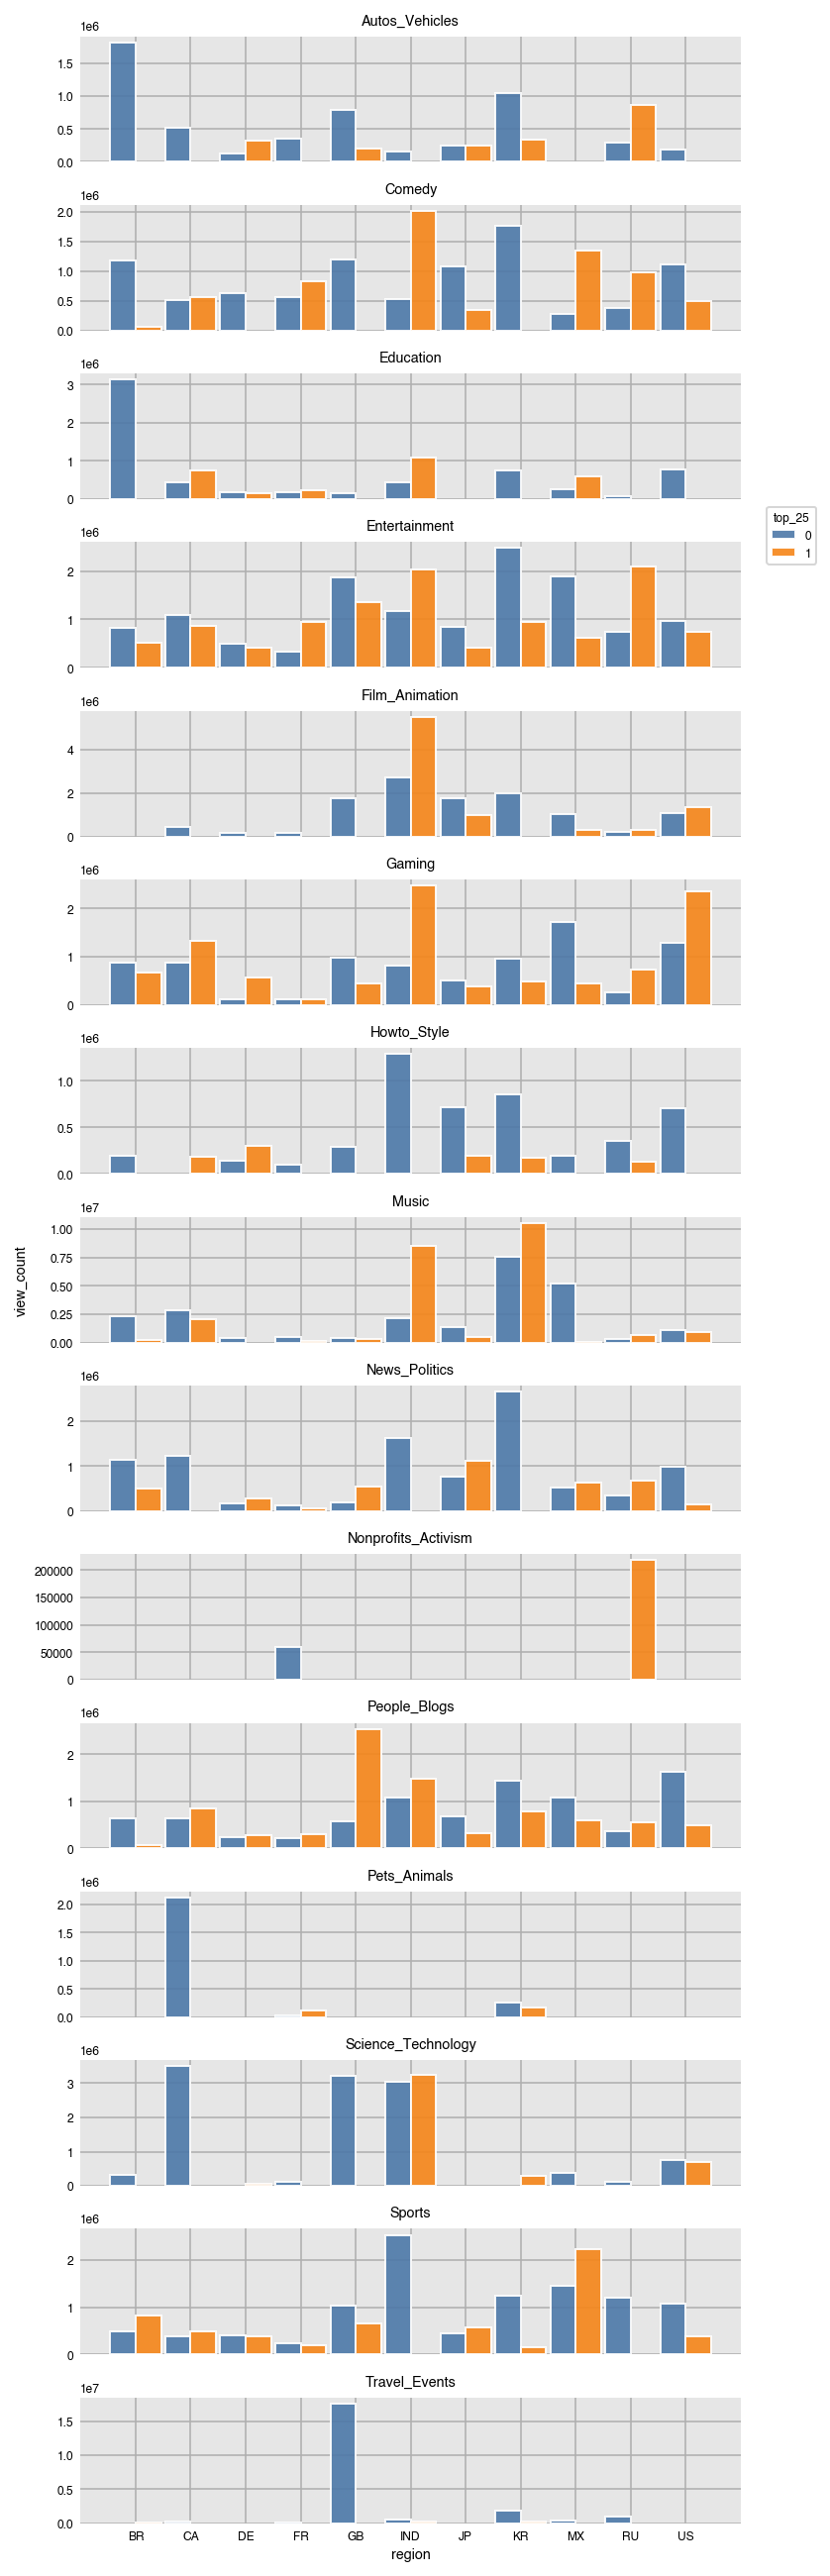

In [16]:
dxp.bar(x='region', y='view_count', row='categoryId', split='top_25', data=df, aggfunc='mean',sharey=False, title='')

## Percent of capital letters in title 


## When we talk about subscribers we can take a look at age of channel


## How to drive up subscribers is a slightly separate question but we can ask it


## At what point does the video view count pass the subscriber view count


## Let’s think about tags and how many words they have in common with the descriptions


In [17]:
stopwords = {'de', 'https', 'http', 'la', 'none'}

In [18]:
word_vault = list()
for row in df.index:
   word_vault.extend(df.iloc[row].word_bank)

In [19]:
testy = ''.join(word_vault)

(-0.5, 399.5, 199.5, -0.5)

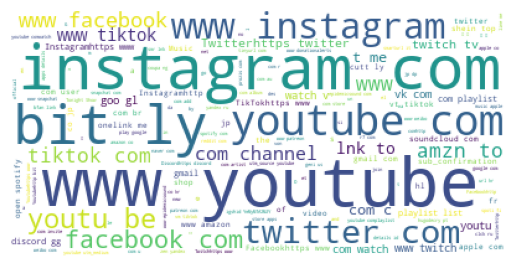

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

img = WordCloud(background_color='white', stopwords=stopwords).generate(testy)
plt.imshow(img)
plt.axis('off')

In [21]:
top_25_tags = list()
for row in df[df.top_25==1].index:
    top_25_tags.extend(list(df[df.top_25==1].loc[row].cleaned_tags))

(-0.5, 399.5, 199.5, -0.5)

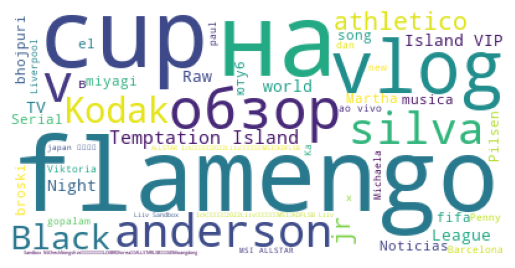

In [22]:
img = WordCloud(background_color='white', stopwords=stopwords ).generate(''.join(top_25_tags))
plt.imshow(img)
plt.axis('off')

In [23]:
outside_25_tags = list()
for row in df[df.top_25!=1].index:
    outside_25_tags.extend(list(df[df.top_25!=1].loc[row].cleaned_tags))
    

(-0.5, 399.5, 199.5, -0.5)

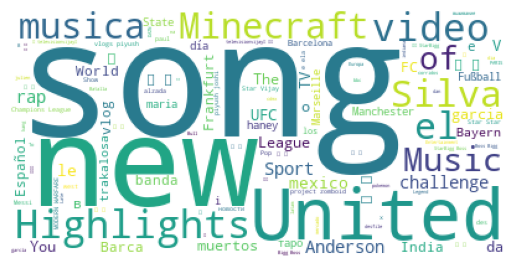

In [24]:
img = WordCloud(background_color='white', stopwords=stopwords).generate(''.join(outside_25_tags))
plt.imshow(img)
plt.axis('off')

In [25]:
# top_25_words_freq = pd.Series(top_25_words).value_counts()
# outside_25_words_freq = pd.Series(outside_25_words).value_counts()
# all_words_freq = pd.Series(word_vault).value_counts()

In [26]:
len(word_vault)

228022

In [27]:
top_25_desc = list()
for row in df[df.top_25==1].index:
    top_25_desc.extend(list(df[df.top_25==1].loc[row].cleaned_desc))

(-0.5, 399.5, 199.5, -0.5)

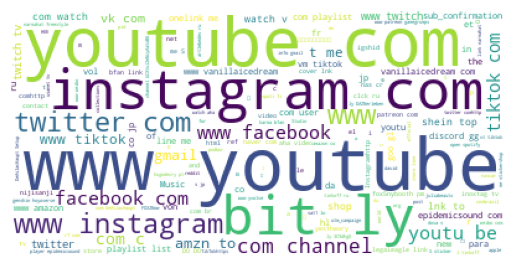

In [28]:
img = WordCloud(background_color='white', stopwords=stopwords).generate(''.join(top_25_desc))
plt.imshow(img)
plt.axis('off')

In [29]:
outside_25_desc = list()
for row in df[df.top_25!=1].index:
    outside_25_desc.extend(list(df[df.top_25!=1].loc[row].cleaned_desc))
    

(-0.5, 399.5, 199.5, -0.5)

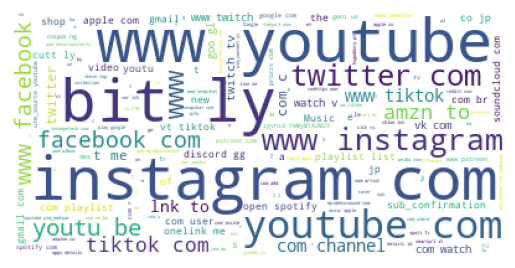

In [30]:
img = WordCloud(background_color='white', stopwords=stopwords).generate(''.join(outside_25_desc))
plt.imshow(img)
plt.axis('off')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 2019 non-null   object             
 1   title                    2019 non-null   object             
 2   publishedAt              2019 non-null   datetime64[ns, UTC]
 3   channelTitle             2019 non-null   object             
 4   categoryId               2019 non-null   object             
 5   trending_date            2019 non-null   datetime64[ns, UTC]
 6   tags                     2019 non-null   object             
 7   view_count               2019 non-null   int64              
 8   likes                    2019 non-null   int64              
 9   comment_count            2019 non-null   int64              
 10  thumbnail_link           2019 non-null   object             
 11  comments_disabled        2019 

## We can target placing videos in/out of the top 25 


## Convert Duration

# Exploration

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


<AxesSubplot:>

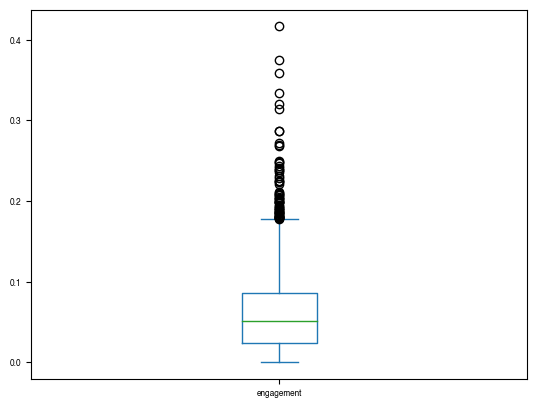

In [33]:
df.engagement.plot.box()

<AxesSubplot:>

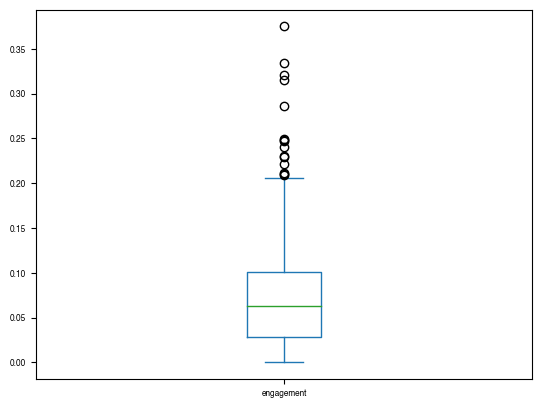

In [34]:
df[df.top_25 == 1].engagement.plot.box()

<AxesSubplot:>

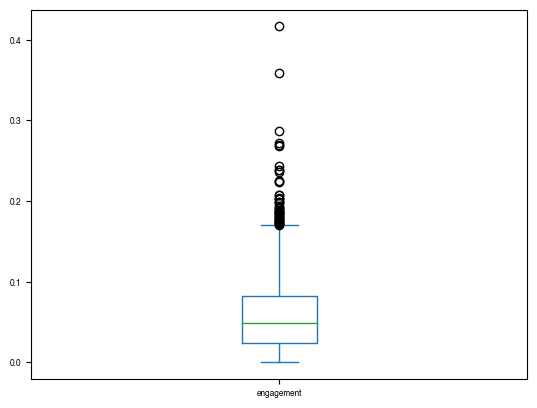

In [35]:
df[df.top_25 != 1].engagement.plot.box()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 2019 non-null   object             
 1   title                    2019 non-null   object             
 2   publishedAt              2019 non-null   datetime64[ns, UTC]
 3   channelTitle             2019 non-null   object             
 4   categoryId               2019 non-null   object             
 5   trending_date            2019 non-null   datetime64[ns, UTC]
 6   tags                     2019 non-null   object             
 7   view_count               2019 non-null   int64              
 8   likes                    2019 non-null   int64              
 9   comment_count            2019 non-null   int64              
 10  thumbnail_link           2019 non-null   object             
 11  comments_disabled        2019 

## Takeaways
* engagement higher with top 25 videos

In [37]:
df.engagement = df.engagement.astype(float)

In [38]:
df.engagement

0       0.020506
1       0.056296
2       0.107647
3       0.094408
4       0.136110
          ...   
2014    0.044955
2015    0.008755
2016    0.030892
2017    0.105084
2018    0.098487
Name: engagement, Length: 2019, dtype: float64

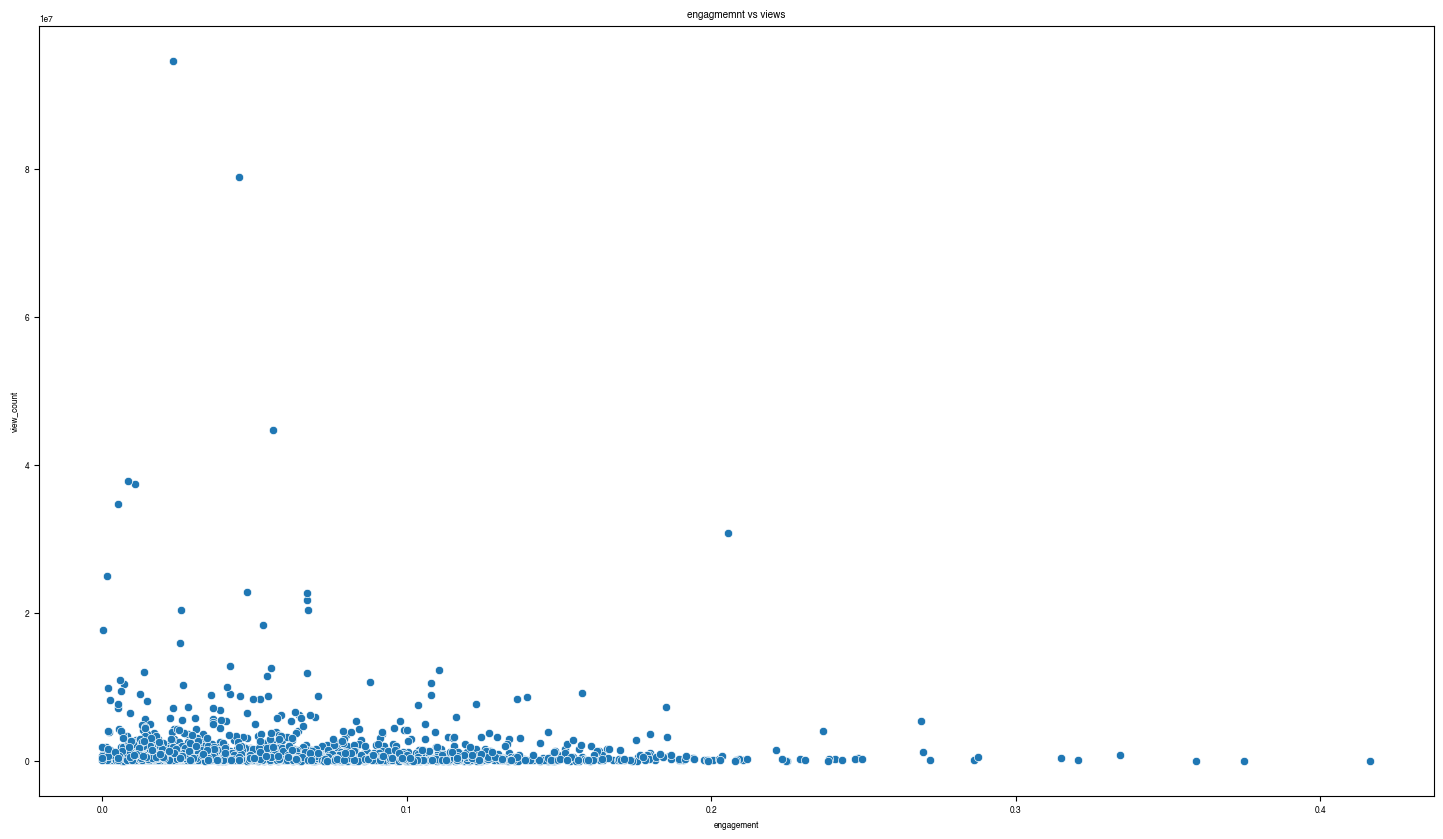

In [39]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.scatterplot(data=df,x='engagement',y='view_count')
plt.title('engagmemnt vs views')
plt.show()

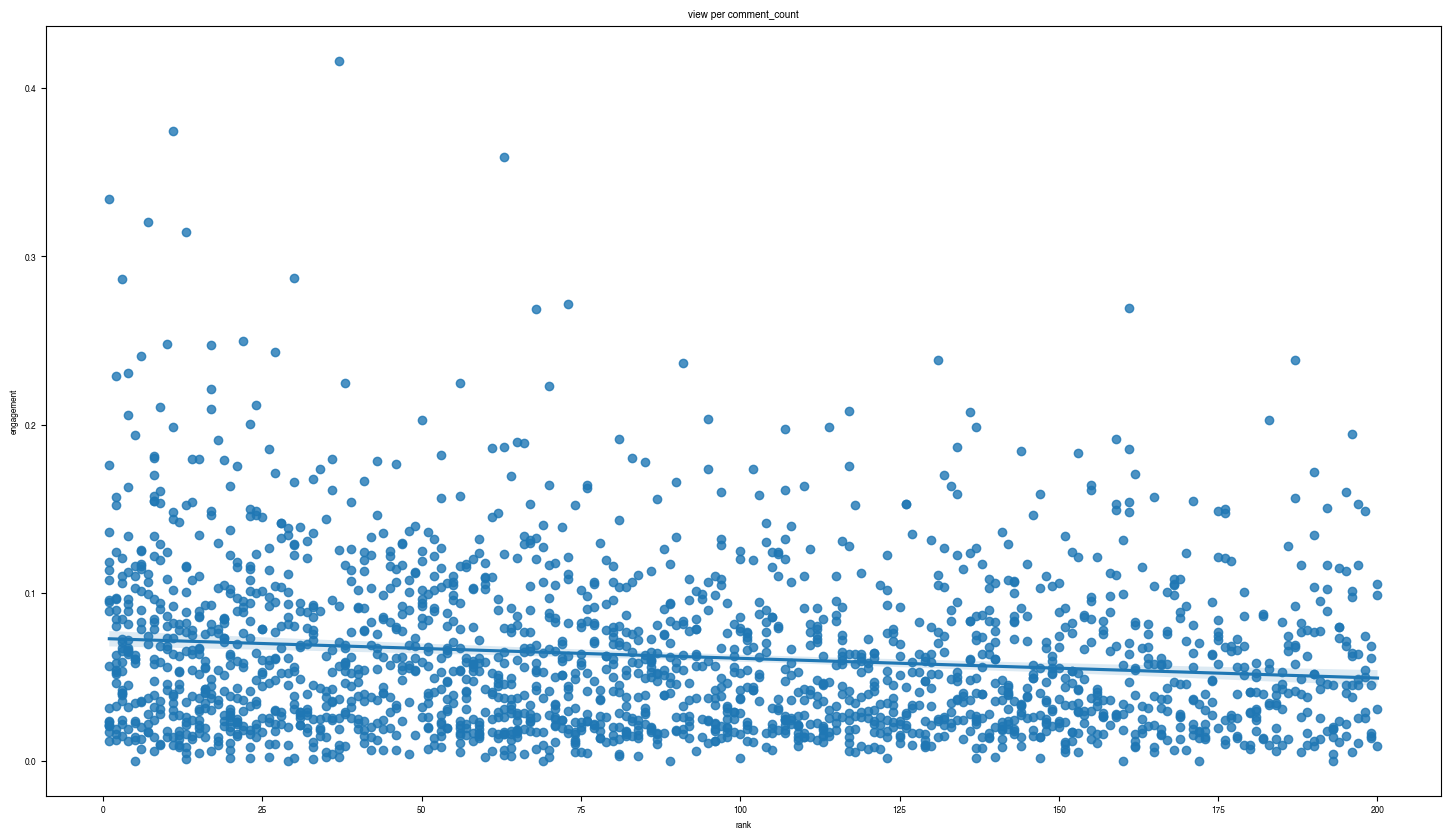

In [40]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=df,x='rank',y='engagement')
plt.title('view per comment_count')
plt.show()

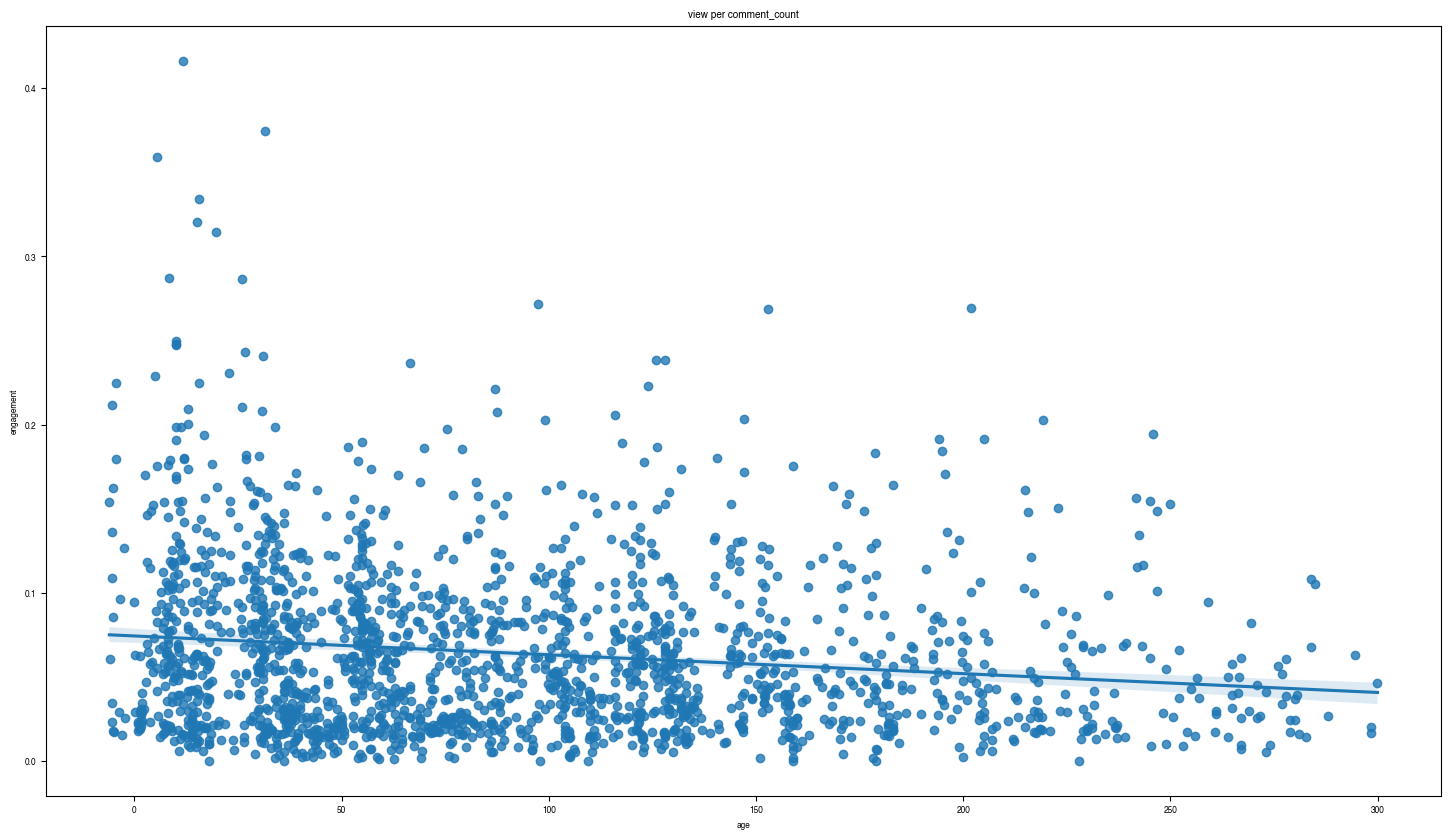

In [41]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=df[df.age < 300],x='age',y='engagement')
plt.title('view per comment_count')
plt.show()

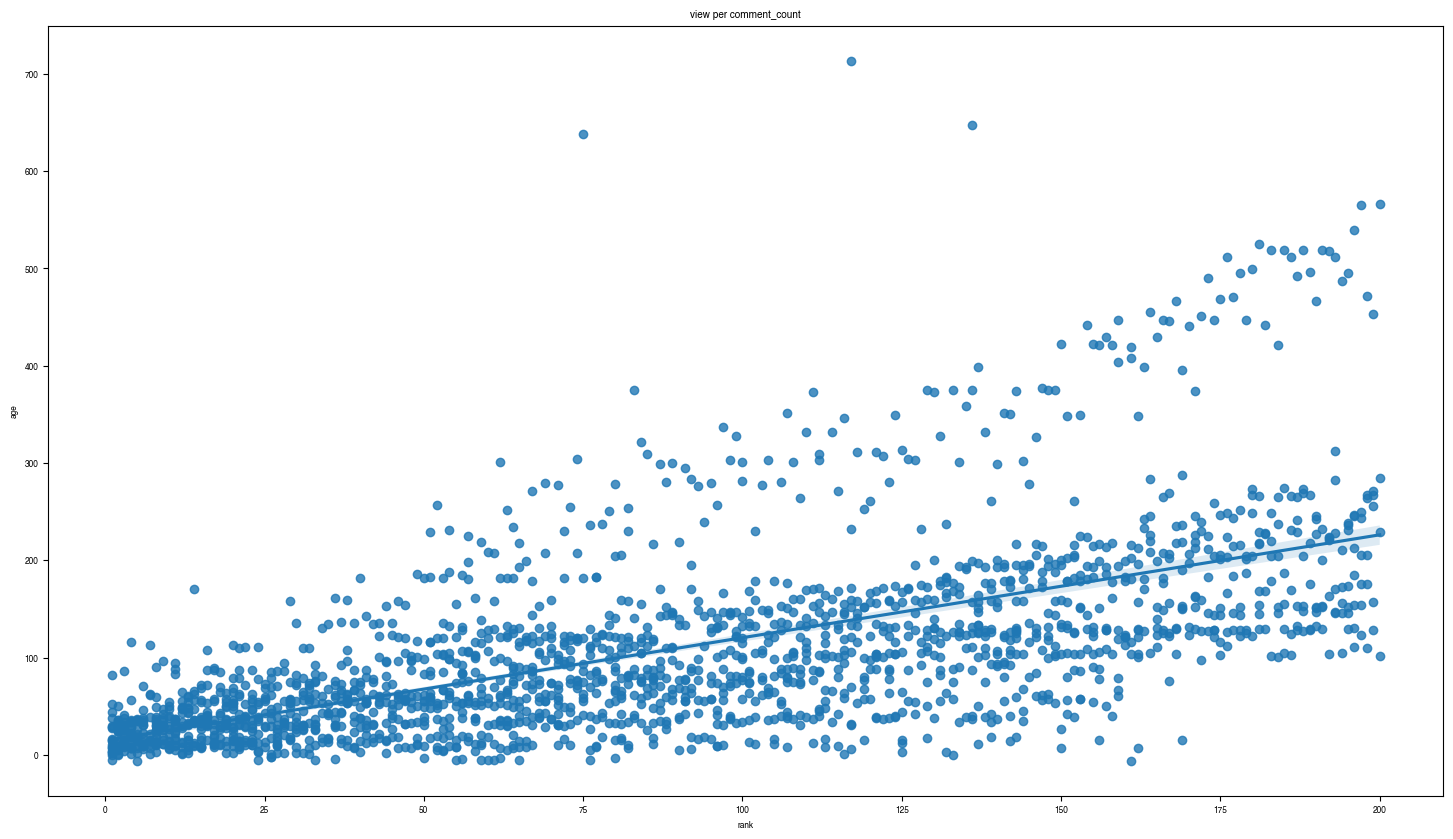

In [42]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=df,x='rank',y='age')
plt.title('view per comment_count')
plt.show()

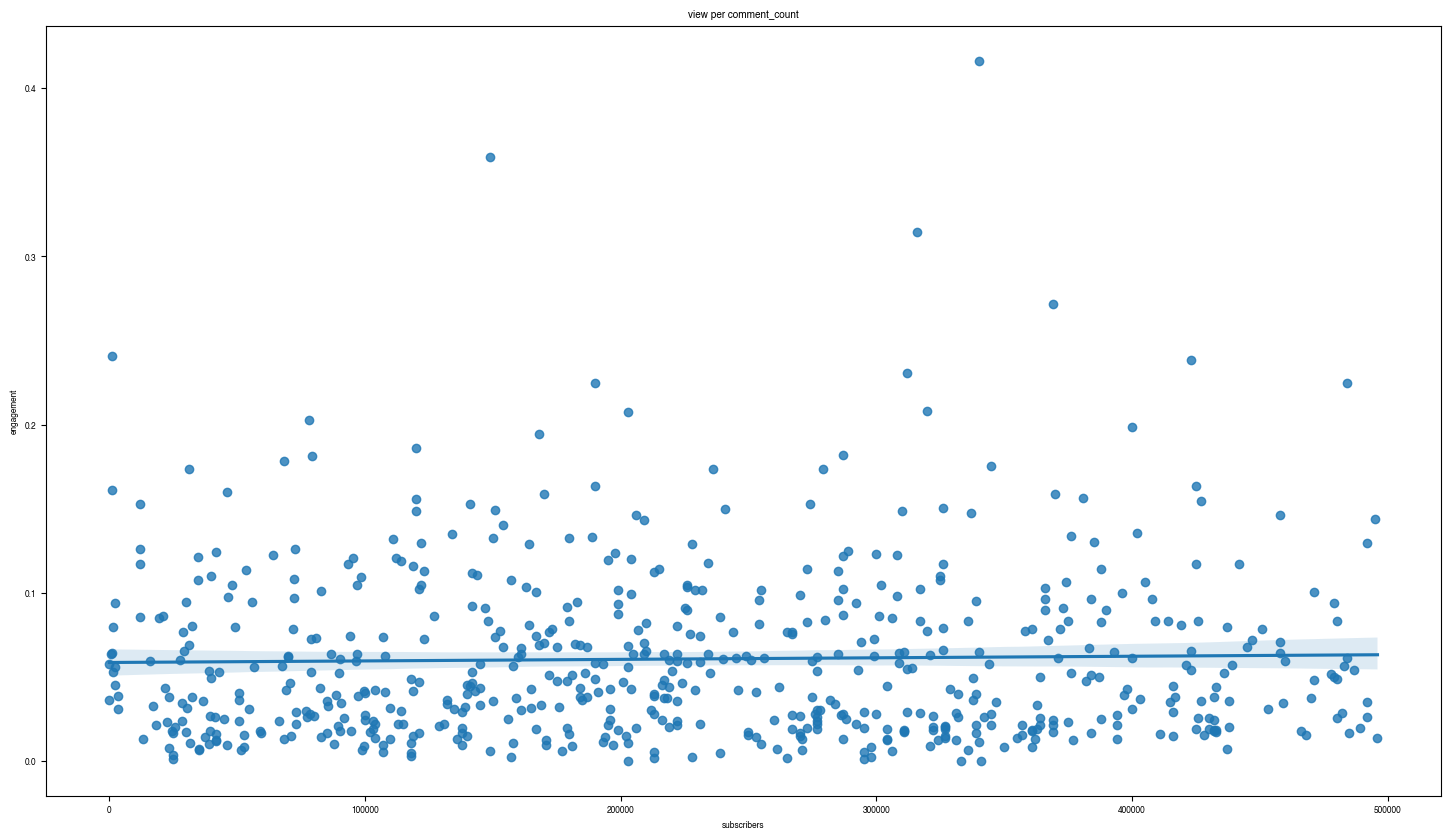

In [43]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=df[df.subscribers<500000],x='subscribers',y='engagement')
plt.title('view per comment_count')
plt.show()

In [44]:
df.select_dtypes('number').columns

Index(['view_count', 'likes', 'comment_count', 'duration', 'rank', 'top_25',
       'channel_age', 'subscribers', 'video_count', 'age', 'engagement',
       'sponsored', 'num_of_tags', 'title_in_description', 'title_in_tags',
       'pct_tags_in_description', 'title_lengths', 'desc_lengths',
       'tags_length', 'content_rate', 'views_per_sub'],
      dtype='object')

<AxesSubplot:>

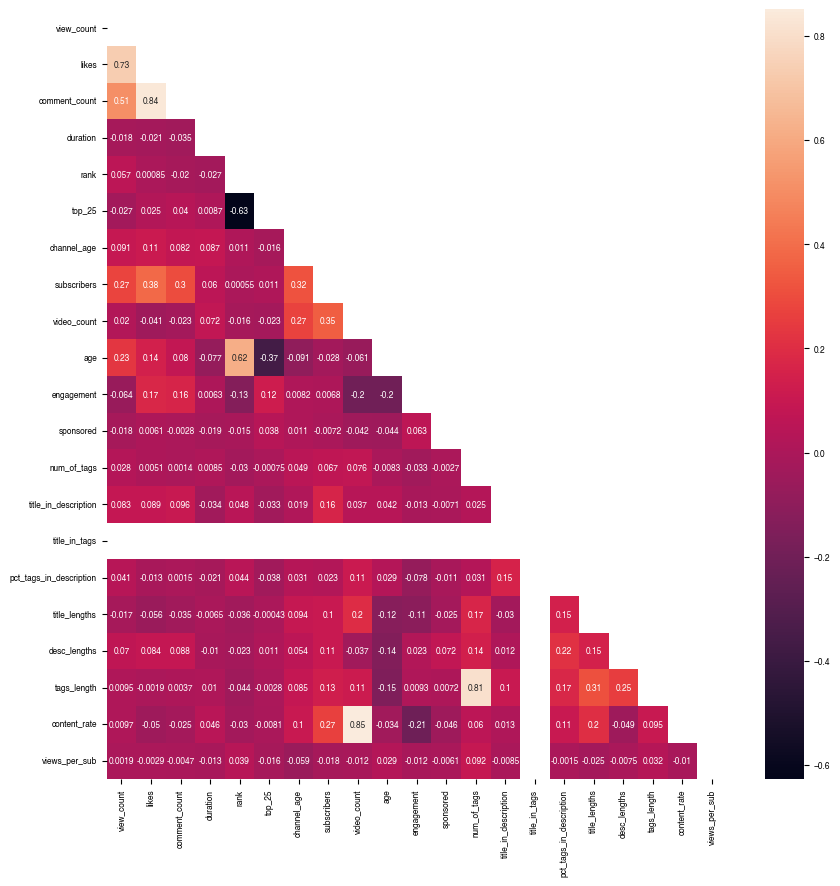

In [45]:

plt.figure(figsize=(10,10))

sns.heatmap(data=df.select_dtypes('number').corr(), \
    mask=np.triu(df.select_dtypes('number').corr()),\
    annot=True)


<AxesSubplot:ylabel='Frequency'>

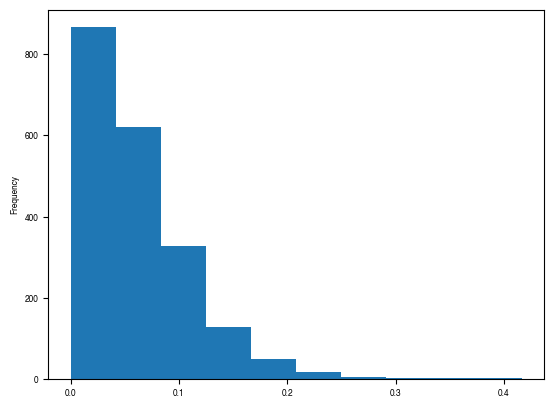

In [46]:
df.engagement.plot.hist()

<AxesSubplot:ylabel='Frequency'>

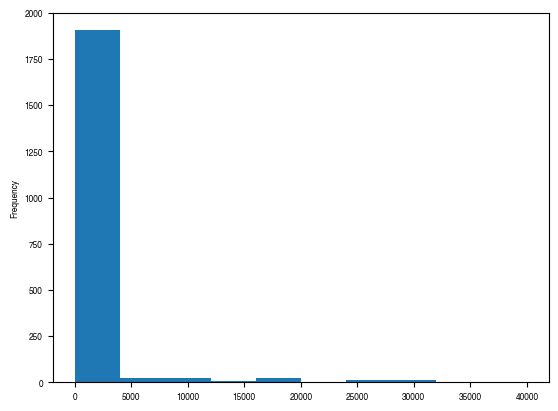

In [47]:
df.duration.plot.hist()

In [48]:
top_25 = df[df.top_25 == 1].copy()
outside_25 = df[df.top_25 != 1].copy()

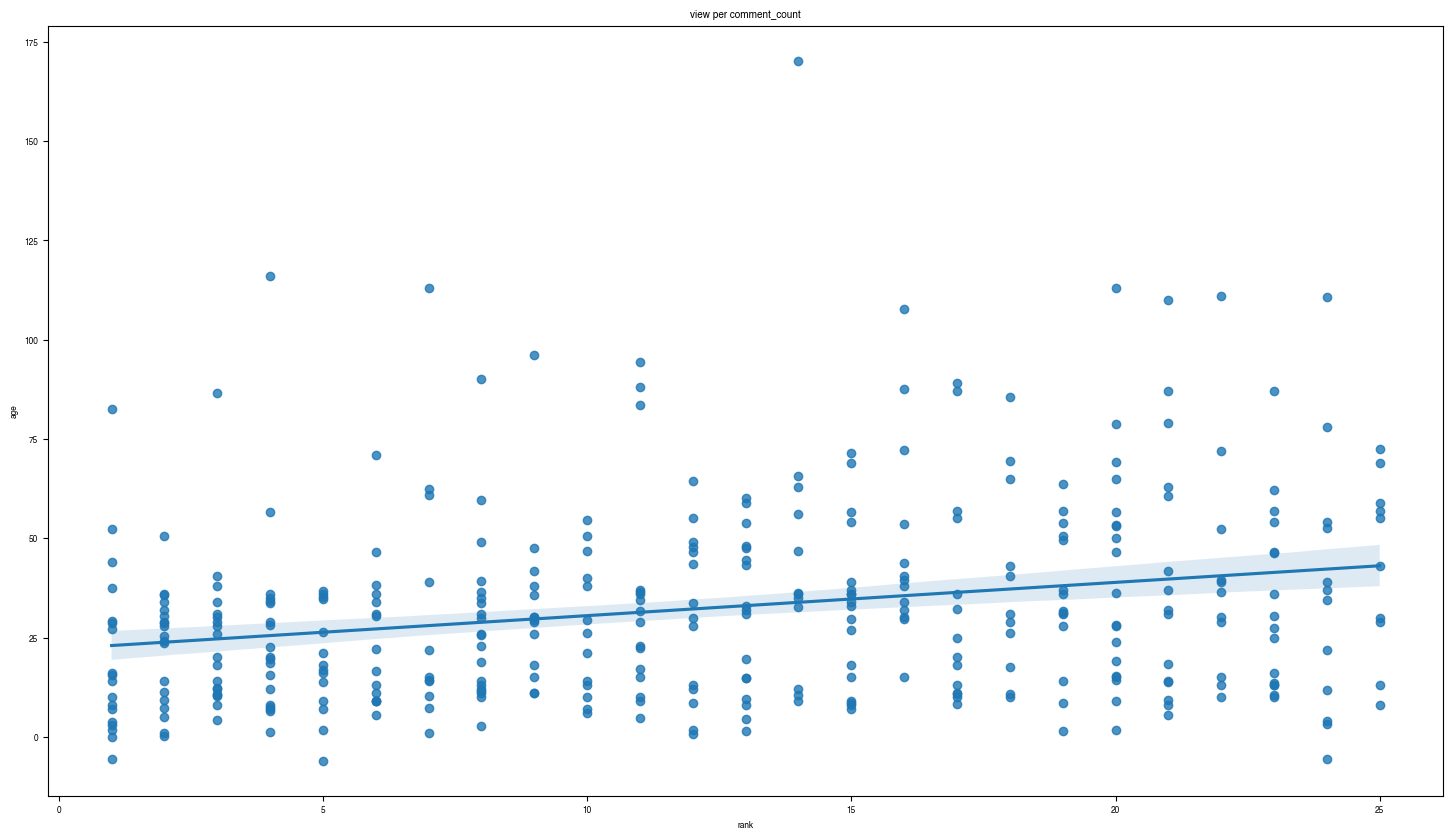

In [49]:
plt.figure(figsize=(18,10))
sns.regplot(data=top_25,x='rank',y='age')
plt.title('view per comment_count')
plt.show()

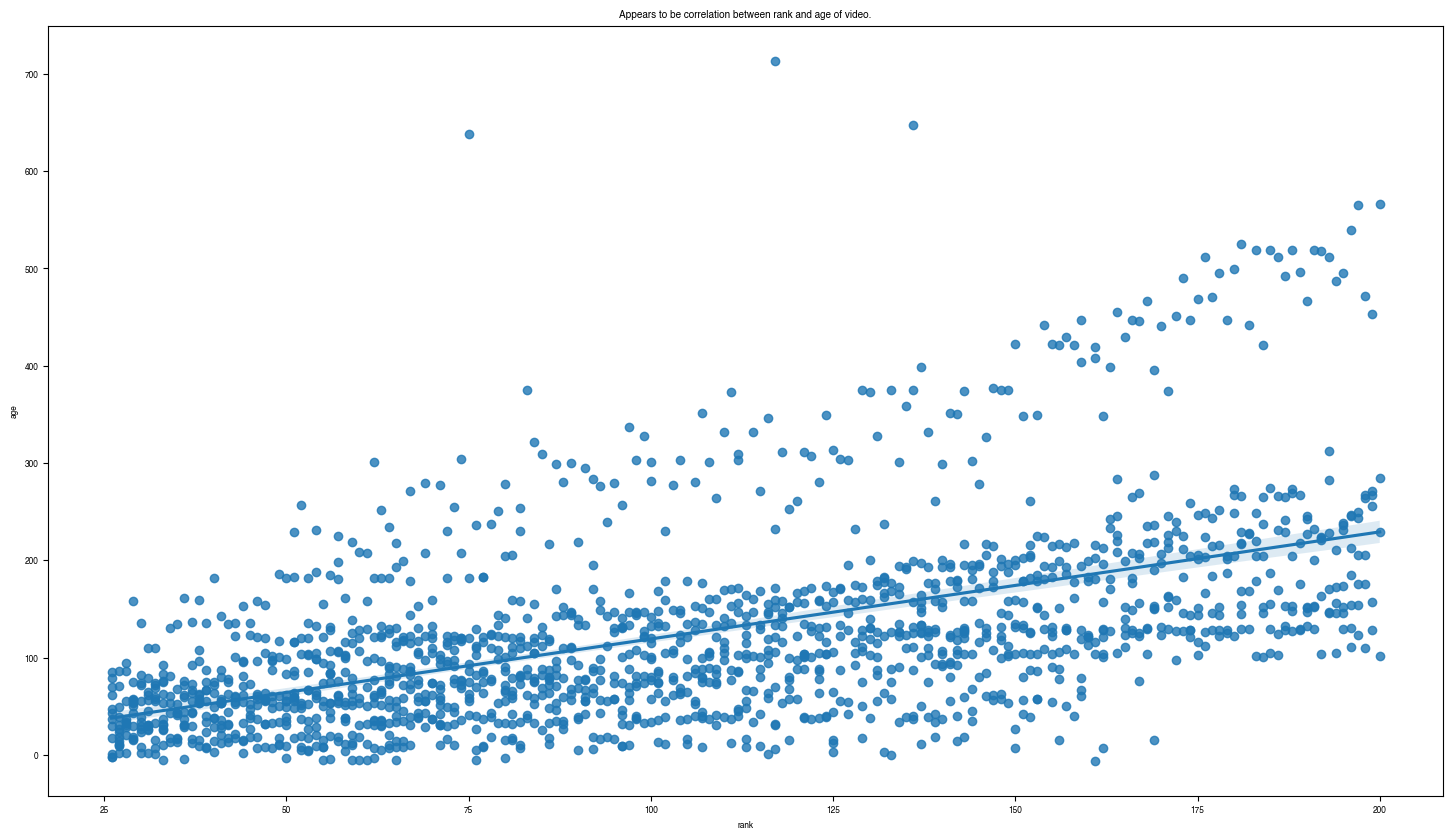

In [50]:
plt.figure(figsize=(18,10))
sns.regplot(data=outside_25,x='rank',y='age')
plt.title('Appears to be correlation between rank and age of video.')
plt.show()

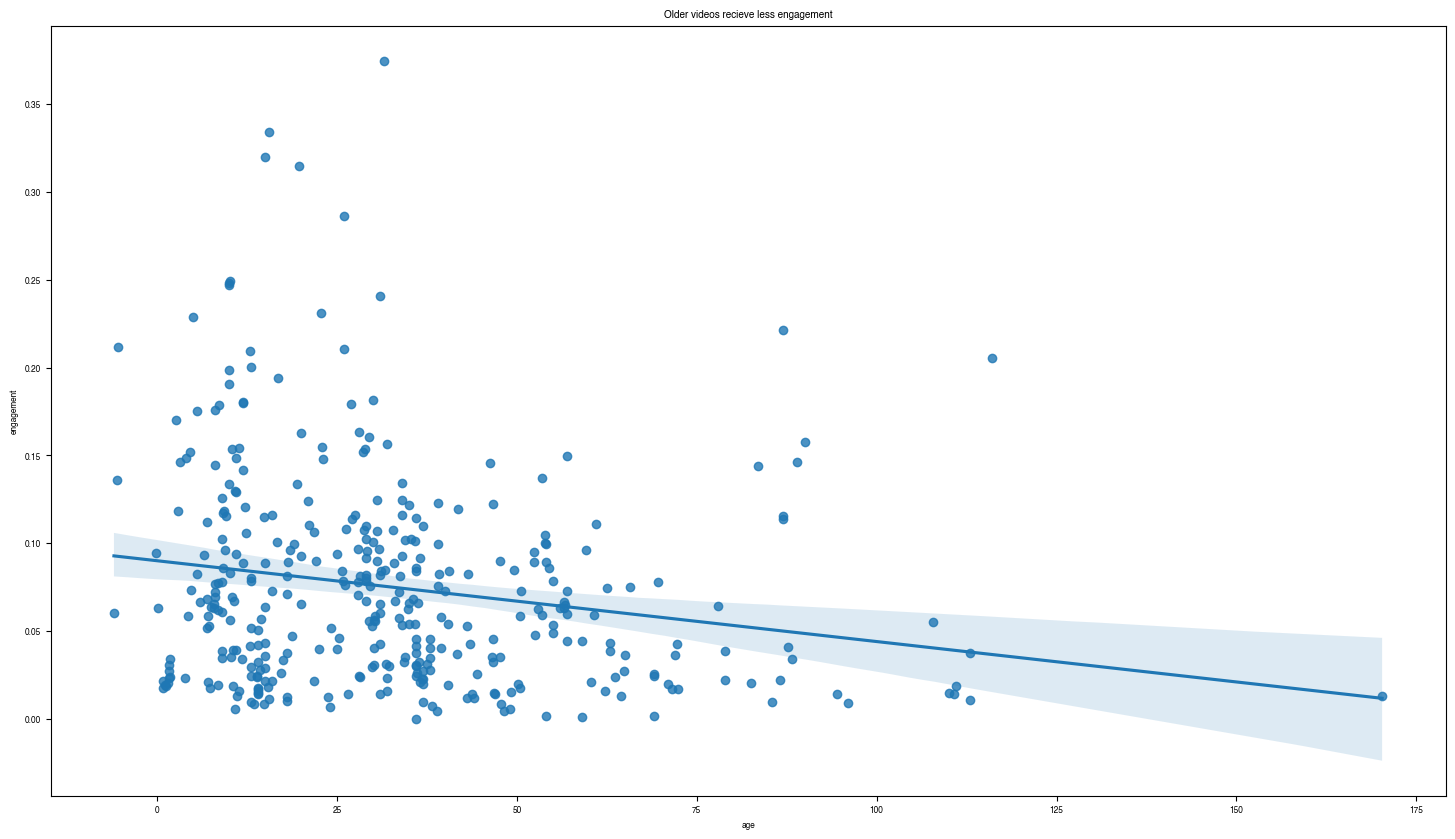

In [51]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(18,10))
sns.regplot(data=top_25,x='age',y='engagement')
plt.title('Older videos recieve less engagement')
plt.show()

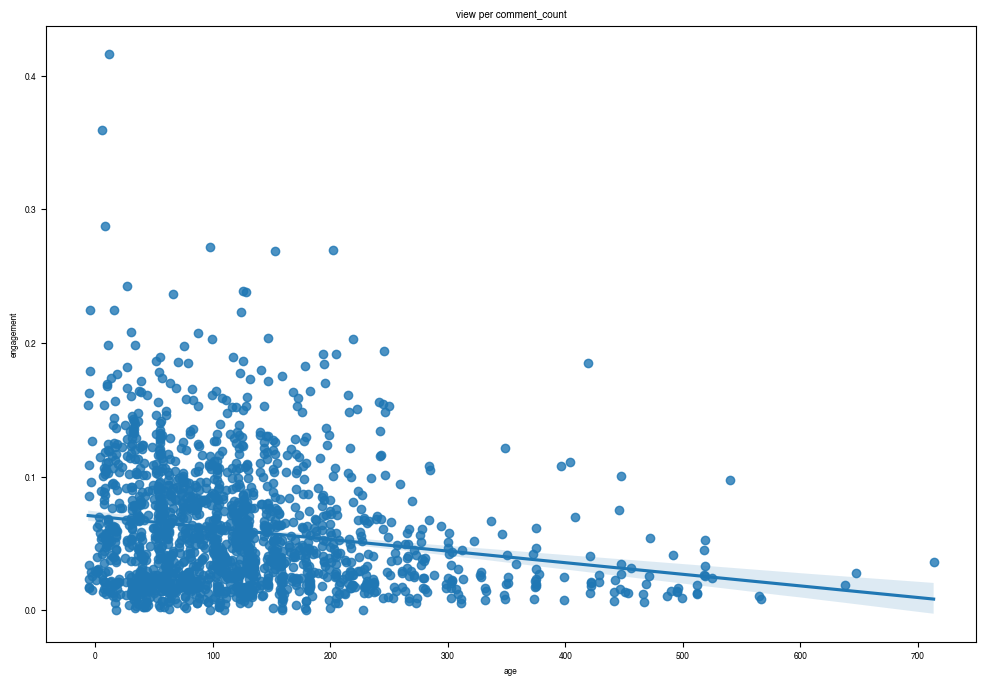

In [52]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(12,8))
sns.regplot(data=outside_25,x='age',y='engagement')
plt.title('view per comment_count')
plt.show()

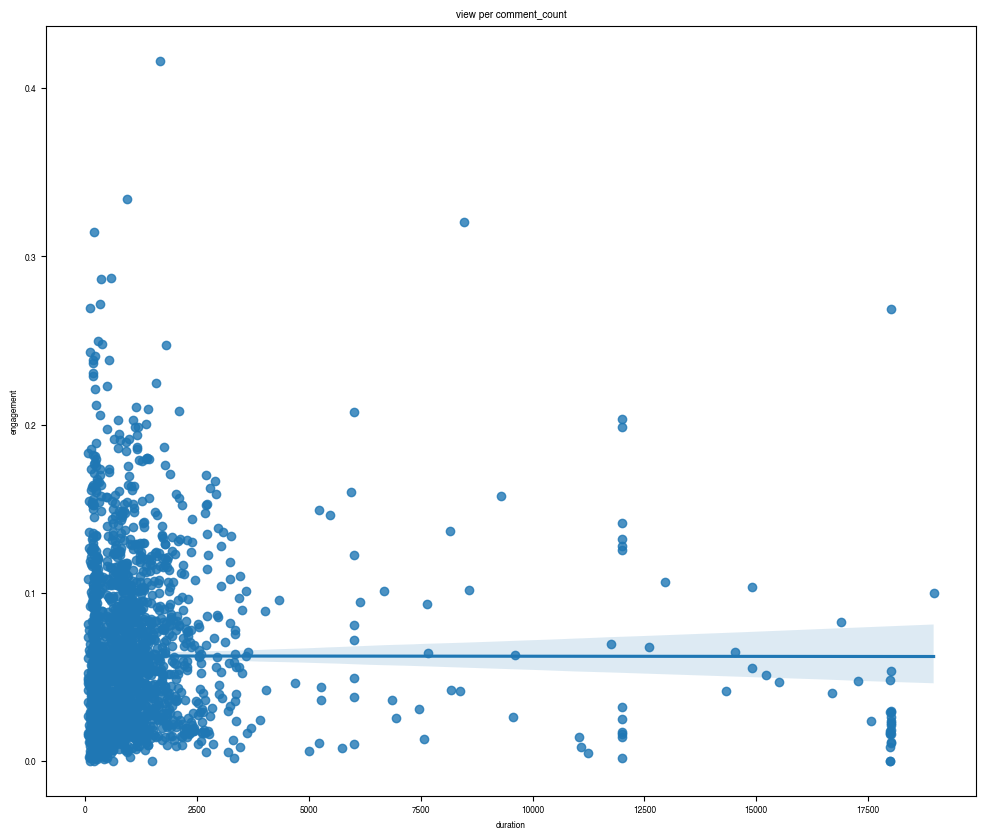

In [53]:
#the amount of comments effect the amoutn. of views 
plt.figure(figsize=(12,10))
sns.regplot(data=df[df.duration < 20000],x='duration',y='engagement')
plt.title('view per comment_count')
plt.show()

In [54]:

# import necessary libraries
import pandas as pd
import os
import glob
  
def acquire ():
    # use glob to get all the csv files 
    # in the folder
    path = os.getcwd()
    csv_files = glob.glob(os.path.join(path, "*.csv"))
    
    testy = pd.DataFrame()  
    # loop over the list of csv files
    for f in csv_files:
        
        # read the csv file
        pesty = pd.read_csv(f)
        
        # print the location and filename
        print('Location:', f)
        print('File Name:', f.split("\\")[-1][-13:-11])
        pesty['region']=f.split("\\")[-1][-13:-11]
        print(pesty.region)

        testy= pd.concat([testy, pesty])
        
        # print the content
        # print('Content:')
        # display(df)
        # print()

    return testy

---
# Phase Two

## Channel Age
Min age of channel with trending and top 25 

Max age of channel with trending and top 25 

Avg age of channels with trending and top 25 


In [55]:
df.channel_age = pd.to_datetime(df.channel_age, utc=True)
fresh = pd.to_datetime('2022-11-02', utc=True)
df.channel_age = abs(fresh - df.channel_age)
df.channel_age = df.channel_age.dt.days

In [56]:
df.channel_age.describe()

count     2019.0
mean     19297.0
std          0.0
min      19297.0
25%      19297.0
50%      19297.0
75%      19297.0
max      19297.0
Name: channel_age, dtype: float64

In [57]:
df.channel_age.median()

19297.0

In [58]:
mask = df.top_25 == 1

In [59]:
df[mask].channel_age.describe()

count      374.0
mean     19297.0
std          0.0
min      19297.0
25%      19297.0
50%      19297.0
75%      19297.0
max      19297.0
Name: channel_age, dtype: float64

In [60]:
df[~mask].channel_age.describe()

count     1645.0
mean     19297.0
std          0.0
min      19297.0
25%      19297.0
50%      19297.0
75%      19297.0
max      19297.0
Name: channel_age, dtype: float64

## Subscriber count   
What percent of subscribers is the view count? Or is it a multiplier?  
Sub v Engagement: do channels with higher sub counts have more engagement


In [61]:
df[['view_count', 'subscribers']]

,view_count,subscribers
0,1098919,2210000
1,681721,6130000
2,423690,325000
3,315692,881000
4,8362197,49000000
...,...,...
2014,1902762,12400000
2015,1835677,321000
2016,1976426,4630000
2017,1529830,7720000


In [62]:
df['views_per_sub'] = df.view_count/df.subscribers

In [63]:
df.views_per_sub.describe()

count    2019.000000
mean        9.238918
std       223.058439
min         0.007329
25%         0.155500
50%         0.370158
75%         0.930189
max      9527.315789
Name: views_per_sub, dtype: float64

In [64]:
df[mask].views_per_sub.describe()

count    374.000000
mean       1.585702
std       11.765638
min        0.007855
25%        0.149078
50%        0.322632
75%        0.768287
max      222.530088
Name: views_per_sub, dtype: float64

In [65]:
df[~mask].views_per_sub.describe()

count    1645.000000
mean       10.978919
std       247.034978
min         0.007329
25%         0.160285
50%         0.376449
75%         0.991794
max      9527.315789
Name: views_per_sub, dtype: float64

## Channel Release Information

Do they have different categories in the top 25?  


In [66]:
df.channelTitle.value_counts()

Vijay Television                6
Sun TV                          6
BT Sport                        6
beIN SPORTS France              6
DAZN UEFA Champions League      5
                               ..
Mainstreet Records              1
Darryl Mayes                    1
Wall Poster Cinema              1
АТН: новости Беларуси и мира    1
Pabllo Vittar                   1
Name: channelTitle, Length: 1679, dtype: int64

In [67]:
df[['channelTitle', 'categoryId']].value_counts().head(60)

channelTitle                 categoryId   
beIN SPORTS France           Sports           6
BT Sport                     Sports           6
Vijay Television             Entertainment    6
Sun TV                       Entertainment    6
HAR PAL GEO                  Entertainment    5
Sony SAB                     Entertainment    5
DAZN UEFA Champions League   Sports           5
ARY Digital HD               Entertainment    5
Problems                     Gaming           4
NBA                          Sports           4
Colors Rishtey               Entertainment    4
STAR भारत                    Entertainment    4
Sourav Joshi Vlogs           People_Blogs     4
StarPlus                     Entertainment    4
Матч ТВ                      Sports           4
Zee Tamil                    Entertainment    4
Enaldinho                    Entertainment    4
FORMULA 1                    Sports           4
Star Maa                     Entertainment    3
Hora do Faro                 Entertainment   

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 2019 non-null   object             
 1   title                    2019 non-null   object             
 2   publishedAt              2019 non-null   datetime64[ns, UTC]
 3   channelTitle             2019 non-null   object             
 4   categoryId               2019 non-null   object             
 5   trending_date            2019 non-null   datetime64[ns, UTC]
 6   tags                     2019 non-null   object             
 7   view_count               2019 non-null   int64              
 8   likes                    2019 non-null   int64              
 9   comment_count            2019 non-null   int64              
 10  thumbnail_link           2019 non-null   object             
 11  comments_disabled        2019 

Do channels release trending videos in multiple categories? No

## Channel View counts
View count vs top 25 → do videos in top 25 have their channels viewed more


In [69]:
df.categoryId.value_counts()

Entertainment          531
Music                  298
Gaming                 288
Sports                 247
People_Blogs           241
Comedy                  98
News_Politics           83
Howto_Style             55
Autos_Vehicles          43
Film_Animation          42
Education               37
Science_Technology      28
Travel_Events           19
Pets_Animals             7
Nonprofits_Activism      2
Name: categoryId, dtype: int64

## Video count
How many views per videos?  
Videos vs age .. what is their release count vs age of channel 


In [70]:
#df['views_per_video'] = df.view_count / df.video_count
df['content_rate'] = df.video_count / df.channel_age

In [71]:
df.content_rate.describe()

count    2019.000000
mean        0.251434
std         0.806983
min         0.000052
25%         0.008006
50%         0.025496
75%         0.096051
max        14.857698
Name: content_rate, dtype: float64

In [72]:
df[mask].views_per_sub.describe()

count    374.000000
mean       1.585702
std       11.765638
min        0.007855
25%        0.149078
50%        0.322632
75%        0.768287
max      222.530088
Name: views_per_sub, dtype: float64

In [73]:
df[~mask].content_rate.describe()

count    1645.000000
mean        0.260097
std         0.833335
min         0.000052
25%         0.007773
50%         0.025755
75%         0.101829
max        14.857698
Name: content_rate, dtype: float64

## Translation
### Basic exploration 


# Data Dictionary Creation

 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   video_id                 2019 non-null   object             
 1   title                    2019 non-null   object             
 2   publishedAt              2019 non-null   datetime64
 3   channelTitle             2019 non-null   object             
 4   categoryId               2019 non-null   object             
 5   trending_date            2019 non-null   datetime64
 6   tags                     2019 non-null   object             
 7   view_count               2019 non-null   int64              
 8   likes                    2019 non-null   int64              
 9   comment_count            2019 non-null   int64              
 10  thumbnail_link           2019 non-null   object             
 11  comments_disabled        2019 non-null   bool               
 12  ratings_disabled         2019 non-null   bool               
 13  description              2019 non-null   object             
 14  duration                 2019 non-null   int64              
 15  captions                 2019 non-null   bool               
 16  region                   2019 non-null   object             
 17  rank                     2019 non-null   int64              
 18  top_25                   2019 non-null   int64              
 19  channel_age              2019 non-null   int64              
 20  subscribers              2019 non-null   int64              
 21  video_count              2019 non-null   int64              
 22  age                      2019 non-null   float64            
 23  engagement               2019 non-null   float64            
 24  sponsored                2019 non-null   int64              
 25  num_of_tags              2019 non-null   int64              
 26  word_bank                2019 non-null   object             
 27  cleaned_tags             2019 non-null   object             
 28  cleaned_desc             2019 non-null   object             
 29  title_in_description     2019 non-null   int64              
 30  title_in_tags            2019 non-null   int64              
 31  pct_tags_in_description  2019 non-null   float64            
 32  title_lengths            2019 non-null   int64              
 33  desc_lengths             2019 non-null   int64              
 34  tags_length              2019 non-null   int64              
 35  views_per_sub            2019 non-null   float64            
 36  content_rate             2019 non-null   float64     

In [74]:
#pd.read_clipboard().to_markdown()

# Engagement Vs Categories

In [75]:
engagement_by_cat = df.groupby('categoryId').mean()['engagement']

In [76]:
round(engagement_by_cat *100, 2)

categoryId
Autos_Vehicles          6.48
Comedy                  7.69
Education               7.24
Entertainment           5.68
Film_Animation          5.82
Gaming                  7.35
Howto_Style             5.02
Music                   7.65
News_Politics           4.54
Nonprofits_Activism    17.17
People_Blogs            6.72
Pets_Animals            5.28
Science_Technology      8.31
Sports                  3.73
Travel_Events           7.68
Name: engagement, dtype: float64

In [77]:
count_by_cat = df.categoryId.value_counts(normalize=True)

In [78]:
round(pd.concat([count_by_cat, engagement_by_cat*100], axis=1),2)

,categoryId,engagement
Entertainment,0.26,5.68
Music,0.15,7.65
Gaming,0.14,7.35
Sports,0.12,3.73
People_Blogs,0.12,6.72
Comedy,0.05,7.69
News_Politics,0.04,4.54
Howto_Style,0.03,5.02
Autos_Vehicles,0.02,6.48
Film_Animation,0.02,5.82


In [79]:
top_25_distro = df[mask].categoryId.value_counts(normalize=True)

In [80]:
outside_25_distro = df[~mask].categoryId.value_counts(normalize=True)

In [81]:
distros = pd.concat([top_25_distro, outside_25_distro],  axis=1)

In [82]:
top_25_distro

Entertainment          0.294118
Gaming                 0.160428
People_Blogs           0.120321
Sports                 0.112299
Music                  0.085561
News_Politics          0.050802
Comedy                 0.050802
Education              0.026738
Howto_Style            0.026738
Film_Animation         0.024064
Autos_Vehicles         0.018717
Science_Technology     0.013369
Travel_Events          0.008021
Pets_Animals           0.005348
Nonprofits_Activism    0.002674
Name: categoryId, dtype: float64

In [83]:
distros.columns.values[0] = 'top_25'

In [84]:
distros.columns.values[1] = 'outside_top_25'

In [85]:
distros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, Entertainment to Nonprofits_Activism
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   top_25          15 non-null     float64
 1   outside_top_25  15 non-null     float64
dtypes: float64(2)
memory usage: 360.0+ bytes


In [86]:
distros['difference'] = distros.iloc[:, 0] - distros.iloc[:, 1]

In [87]:
round(distros.sort_values(by='top_25'), 3)

,top_25,outside_top_25,difference
Nonprofits_Activism,0.003,0.001,0.002
Pets_Animals,0.005,0.003,0.002
Travel_Events,0.008,0.010,-0.002
Science_Technology,0.013,0.014,-0.001
Autos_Vehicles,0.019,0.022,-0.003
Film_Animation,0.024,0.020,0.004
Education,0.027,0.016,0.010
Howto_Style,0.027,0.027,-0.001
News_Politics,0.051,0.039,0.012
Comedy,0.051,0.048,0.003


In [88]:
(df.top_25==1).mean()

0.18524021792966816

# Phase 3
* acquire new videos
* prep
* combine with old dframe for trending or not
* feed into model for trending or not
* decombine 
* feed newer data (not trending) into model again to label as *possibly trending or not???
* ???

In [93]:
df.groupby(['region', 'categoryId'])['engagement'].mean()

region  categoryId        
BR      Autos_Vehicles        0.000000
        Comedy                0.147304
        Education             0.047149
        Entertainment         0.087452
        Gaming                0.073665
                                ...   
US      Music                 0.097586
        News_Politics         0.033548
        People_Blogs          0.067116
        Science_Technology    0.050523
        Sports                0.026205
Name: engagement, Length: 141, dtype: float64

In [96]:
df.drop(columns='description').to_csv('for_tab.csv')